##  分类准确度 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()  # 加载手写数字相应类库

In [3]:
digits.keys() # 和之前鸢尾花的数据集内容大致相似

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
X = digits.data
X.shape # 一共有1797个样本，每个样本有64个特征

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

In [7]:
digits.target_names # 一共有10个类别

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y[:100] # 乱序排列的，并非有序

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [9]:
X[:10] # 每一行有64个数据，对应64个像素点

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [10]:
some_dight = X[666] # 取出某一个值进行观察
y[666] # 该数字为0

0

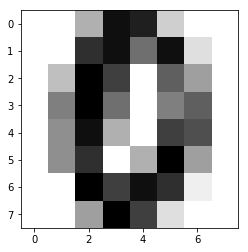

In [11]:
some_dight_image = some_dight.reshape(8, 8) # 可视化
plt.imshow(some_dight_image, cmap = matplotlib.cm.binary)

In [12]:
%run D:\\python-code\train_test_split.py # 切分原始数据集为训练数据集和测试数据集

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)

In [14]:
%run  D:\\python-code\KNN.py # 加载自己封装的kNN算法

In [15]:
my_knn = kNNClassifier(k=3)

In [16]:
my_knn.fit(X_train, y_train)

KNN(k=3)

In [17]:
y_predict = my_knn.predict(X_test)

In [18]:
sum(y_predict == y_test) / len(y_test) # 预测准确率

0.9832869080779945

#### 封装预测准确率函数

In [19]:
%run D:\\python-code\metrics.py

In [20]:
accuracy_score(y_test, y_predict)

0.9832869080779945

有时候我们只关心准确率，而不关心预测结果，下面我们 kNN中封装一个函数 score，直接预测准确率。

In [21]:
my_knn.score(X_test, y_test) # 改动了kNN，需要 restat kernel

0.9832869080779945

### scikit-learn中的accuracy_score

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
y_predict = knn_clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_predict)

0.9888888888888889

In [40]:
knn_clf.score(X_test, y_test) # 自定义

0.9888888888888889